In [389]:
#********************************LIBRARIES*******************************************************************
#import necessary libraries
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
#********************************END OF LIBRARIES ***********************************************************

In [416]:
#************************************FIRST QUESTION ************************************************************
#Load GlenCove DataSet 
df= pd.read_excel('GlenCove.xlsx') 
df.head(n = 10) # The First 10 rows by using head method

,Address,Fair Market Value($000),Property Size (acres),Age,House Size (square feet),Rooms,Baths,Garage
0,9 Sycamore Road,522.9,0.2297,56,2448,7,3.5,2
1,21 Jefferson St,425.0,0.2192,61,1942,7,2.5,1
2,38 Hitching Post Lane,539.2,0.1630,39,2073,5,3.0,2
3,4 Poppy Lane,628.2,0.4608,28,2707,8,2.5,1
4,5 Daniel Drive,490.4,0.2549,56,2042,7,1.5,1
5,15 Francis Terrace,487.7,0.2290,98,2089,7,2.0,0
6,23 Guilfoy Street,370.3,0.1808,58,1433,7,2.0,0
7,17 Carlyle Drive,777.9,0.5015,17,2991,9,2.5,1
8,8 Craft Avenue,347.1,0.2229,62,1008,5,1.0,0
9,22 Beechwood Ct.,756.8,0.1300,25,3202,8,2.5,2


In [417]:
#Renaming the columns names 
df.rename({'Fair Market Value($000)':'market_value','Property Size (acres)':'property_size','House Size (square feet)':'house_size'},axis=1,inplace=True)
df #To verify that column values have changed 

,Address,market_value,property_size,Age,house_size,Rooms,Baths,Garage
0,9 Sycamore Road,522.9,0.2297,56,2448,7,3.5,2
1,21 Jefferson St,425.0,0.2192,61,1942,7,2.5,1
2,38 Hitching Post Lane,539.2,0.1630,39,2073,5,3.0,2
3,4 Poppy Lane,628.2,0.4608,28,2707,8,2.5,1
4,5 Daniel Drive,490.4,0.2549,56,2042,7,1.5,1
5,15 Francis Terrace,487.7,0.2290,98,2089,7,2.0,0
6,23 Guilfoy Street,370.3,0.1808,58,1433,7,2.0,0
7,17 Carlyle Drive,777.9,0.5015,17,2991,9,2.5,1
8,8 Craft Avenue,347.1,0.2229,62,1008,5,1.0,0
9,22 Beechwood Ct.,756.8,0.1300,25,3202,8,2.5,2


In [418]:
#Create a new dataframe without age column 
new_df = df.drop('Age',axis=1)
new_df #For Verification purpose 

,Address,market_value,property_size,house_size,Rooms,Baths,Garage
0,9 Sycamore Road,522.9,0.2297,2448,7,3.5,2
1,21 Jefferson St,425.0,0.2192,1942,7,2.5,1
2,38 Hitching Post Lane,539.2,0.1630,2073,5,3.0,2
3,4 Poppy Lane,628.2,0.4608,2707,8,2.5,1
4,5 Daniel Drive,490.4,0.2549,2042,7,1.5,1
5,15 Francis Terrace,487.7,0.2290,2089,7,2.0,0
6,23 Guilfoy Street,370.3,0.1808,1433,7,2.0,0
7,17 Carlyle Drive,777.9,0.5015,2991,9,2.5,1
8,8 Craft Avenue,347.1,0.2229,1008,5,1.0,0
9,22 Beechwood Ct.,756.8,0.1300,3202,8,2.5,2


In [420]:
#change 2 to 1
for idx, row in new_df.iterrows():   # Loop Through Garage column and change the value to 1 if it was 2 
    if  new_df.loc[idx,'Garage'] == 2:
        new_df.loc[idx,'Garage'] = 1
new_df #For verification purpose 

,Address,market_value,property_size,house_size,Rooms,Baths,Garage
0,9 Sycamore Road,522.9,0.2297,2448,7,3.5,1
1,21 Jefferson St,425.0,0.2192,1942,7,2.5,1
2,38 Hitching Post Lane,539.2,0.1630,2073,5,3.0,1
3,4 Poppy Lane,628.2,0.4608,2707,8,2.5,1
4,5 Daniel Drive,490.4,0.2549,2042,7,1.5,1
5,15 Francis Terrace,487.7,0.2290,2089,7,2.0,0
6,23 Guilfoy Street,370.3,0.1808,1433,7,2.0,0
7,17 Carlyle Drive,777.9,0.5015,2991,9,2.5,1
8,8 Craft Avenue,347.1,0.2229,1008,5,1.0,0
9,22 Beechwood Ct.,756.8,0.1300,3202,8,2.5,1


In [421]:
#Print summary statistics
print(new_df[['market_value','property_size', 'house_size', 'Rooms','Baths', 'Garage']].describe())

       market_value  property_size   house_size      Rooms      Baths  \
count     30.000000      30.000000    30.000000  30.000000  30.000000   
mean     474.910000       0.275960  1978.833333   6.833333   2.000000   
std      144.312669       0.236445   550.875234   1.487496   0.694808   
min      310.200000       0.085200  1008.000000   5.000000   1.000000   
25%      374.675000       0.152650  1622.250000   6.000000   1.625000   
50%      431.200000       0.204050  1992.000000   7.000000   2.000000   
75%      535.125000       0.270350  2205.500000   7.750000   2.500000   
max      889.000000       1.310000  3202.000000  11.000000   3.500000   

          Garage  
count  30.000000  
mean    0.566667  
std     0.504007  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     1.000000  
max     1.000000  


In [422]:
#print correlation matrix 
print(new_df[['property_size','house_size','Rooms','Baths']].corr())

               property_size  house_size     Rooms     Baths
property_size       1.000000    0.211664  0.052963  0.053408
house_size          0.211664    1.000000  0.399573  0.521314
Rooms               0.052963    0.399573  1.000000  0.133457
Baths               0.053408    0.521314  0.133457  1.000000


In [423]:
#comment Directioon of our matrix 
#there is a weak correlation matrix of 0.322901 between Property_size and house_size which means large or small property_size does not necessarly mean large or small house_size.
#There is weak correlation matrix of 0.143290 between Property_size and Rooms , which means number of rooms does not depend on property_size
#There is a very weak correlation matrix of 0.095657 between Property_size and Baths, which means number of Baths does not depend on property_size
#There is a strong correlation matrix of 0.564439 between house_size and Rooms, which means number of rooms depend on house_size.
#There is a weak correlation matrix of 0.266669 between Rooms and Baths, which means number of baths does not depend on number of rooms.
#There is a significant correlation matrix of 0.433709 between house_size and baths, which means sometimes number of baths might depend on house_size.

In [424]:
#Multiple Linear Regression Model 
model = smf.ols('market_value ~ property_size + house_size + Rooms + Baths', new_df).fit()
print (model.summary()) # To print result summary 

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     26.37
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.19e-08
Time:                        03:55:58   Log-Likelihood:                -166.44
No. Observations:                  30   AIC:                             342.9
Df Residuals:                      25   BIC:                             349.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        74.6255     67.401      1.107

In [425]:
#Create Anova Table 
anovaTable = sm.stats.anova_lm(model, typ=2)
print(anovaTable) #print anova Table

                      sum_sq    df          F        PR(>F)
property_size  213143.207909   1.0  46.043219  4.117772e-07
house_size      68037.774291   1.0  14.697527  7.584083e-04
Rooms             111.633085   1.0   0.024115  8.778397e-01
Baths           16370.469200   1.0   3.536351  7.173689e-02
Residual       115729.967046  25.0        NaN           NaN


In [426]:
# Why multiple linear regression is a good mode
# Multiple linear regression is perfect to display the linear relationship between one quantitative response variable and more than one predictor variable.
# Multiple linear regression is a good model because  it shows  Log-Likelihood of a response variable to depend on a predictor variable.
# Alo this model helps to compute the sum of squared errors to measures how far the multiple linear regression function is from the data points

In [474]:
#the regression equation with the coefficients from the model output  
# E(Y)= Bo+B1X1 + B2X2 + B3X3 +B4X4
# Bo is intercept
#B1 property_house queficient
#B2 house_size quoeficient
#B3 Rooms quoeficient
#B4 Baths quoeficient
#E(Y) = 74.6255 +372.1856X1 + 0.1146X2 + 1.4468X3 + 40.3606X4


In [427]:
#Create a new dataframe for market value prediction
x0 = pd.DataFrame(np.array([[0.30,2000,6,2,1]]),columns=['property_size','house_size', 'Rooms', 'Baths', 'Garage'])
x0 #For verification purpose 

,property_size,house_size,Rooms,Baths,Garage
0,0.3,2000.0,6.0,2.0,1.0


In [428]:
#Market Value Prediction
model.predict(x0) 

0    487.488319
dtype: float64

In [429]:
#***************************END OF FIRST QUESTION*****************************************************************

#***************************SECOND QUESTION**********************************************************************
#Load NBAValues DataSet 
nbaValues_df= pd.read_excel('NBAValues.xlsx') 
nbaValues_df # Display the entire dataset 

,Team Name,Team Code,Revenue ($mil),Current Value ($mil)
0,Atlanta Hawks,ATL,133,825
1,Boston Celtics,BOS,173,1700
2,Brooklyn Nets,BKN,212,1500
3,Charlotte Bobcats,CHA,130,725
4,Chicago Bulls,CHI,201,2000
5,Cleveland Cavaliers,CLE,149,915
6,Dallas Mavericks,DAL,168,1150
7,Denver Nuggets,DEN,136,855
8,Detroit Pistons,DET,144,810
9,Golden State Warriors,GSW,168,1300


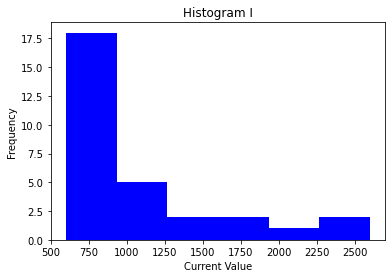

In [430]:
#Histogram When Bins= 6
fig, ax = plt.subplots()
plt.hist(nbaValues_df['Current Value ($mil) '], bins=6, color = 'blue')
ax.set_xlabel('Current Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram I')
plt.savefig('histogram6.png')
plt.show()

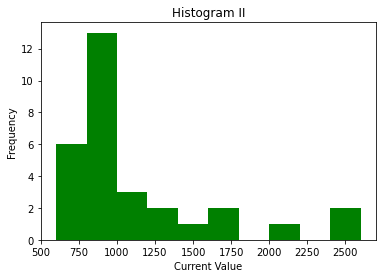

In [431]:
#Histogram When Bins = 10 
fig, ax = plt.subplots()
plt.hist(nbaValues_df['Current Value ($mil) '], bins=10, color = 'green')
ax.set_xlabel('Current Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram II')
plt.savefig('histogram10.png')
plt.show()

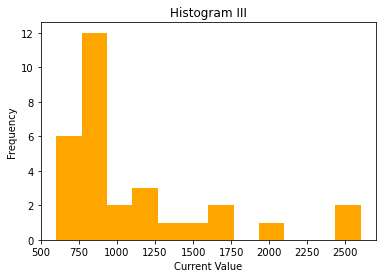

In [432]:
#Histogram When Bins = 12
fig, ax = plt.subplots()
plt.hist(nbaValues_df['Current Value ($mil) '], bins=12, color = 'orange')
ax.set_xlabel('Current Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram III')
plt.savefig('histogram12.png')
plt.show()

In [475]:
#the best number of bins for this dataset 
# 12 bins are the best because they show the specific value of current value  it is not clustered like at 6 bins

#the shape of the distribution
# This shape is left-skewed because the distribution is skewd to the left
#******************************************END OF SECOND QUESTION******************************************

In [434]:
#***************************3RD QUESTION**********************************************************************
#Load NBAValues DataSet 
baseball_df= pd.read_csv('baseball_values.csv') 
baseball_df # For Verification Purpose 

,Team,Revenue,Value
0,Baltimore,245,1000
1,Boston,370,2100
2,Chicago White Sox,227,975
3,Cleveland,207,825
4,Detroit,254,1125
5,Houston,175,800
6,Kansas City,231,700
7,Los Angeles Angels,304,1300
8,Minnesota,223,895
9,New York Yankees,508,3200


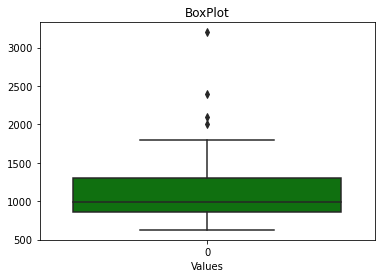

In [435]:
# plot
fig, bp = plt.subplots() #Create a plot 
sns.boxplot(data = baseball_df['Value'], color = 'green')
bp.set_title('BoxPlot') #Add title 
bp.set_xlabel('Values') #Add x label 

# shows the image
plt.show()

<AxesSubplot:>

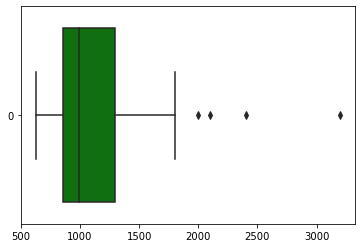

In [437]:
#plot Horizontally 
sns.boxplot(data = baseball_df['Value'], color = 'green', orient ='h')

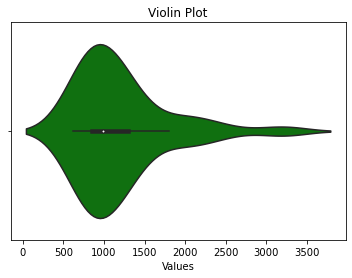

In [438]:
# VIOLIN plot
ap = sns.violinplot(x="Value", data=baseball_df, color ="green")
ap.set_title('Violin Plot') #Add title 
ap.set_xlabel('Values') #Add x label 
# saves the image
plt.savefig("Valuesviolinplot.png")
# shows the image
plt.show()

In [476]:

# The approxiamte mode of the data set is 1000 

In [440]:
#***********************************END OF 3RD QUESTION******************************************************

In [444]:
#***********************************4TH QUESTION**************************************************************
#Load NBAValues DataSet 
fruits_df= pd.read_csv('fruit.tsv', sep='\t') 
fruits_df.head() # Display the first 5 rows

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [445]:
#Calculate fruits Occurencies
fruits_df['fruit_name'].value_counts()
# predct = dict(zip(fruits_df.fruit_label.unique(), fruits_df.fruit_name.unique()))   
# predct

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [446]:
fruits_subset_df = fruits_df[['fruit_name','mass','width','height','color_score']]
fruits_subset_df.head() #For Verification purpose 

,fruit_name,mass,width,height,color_score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


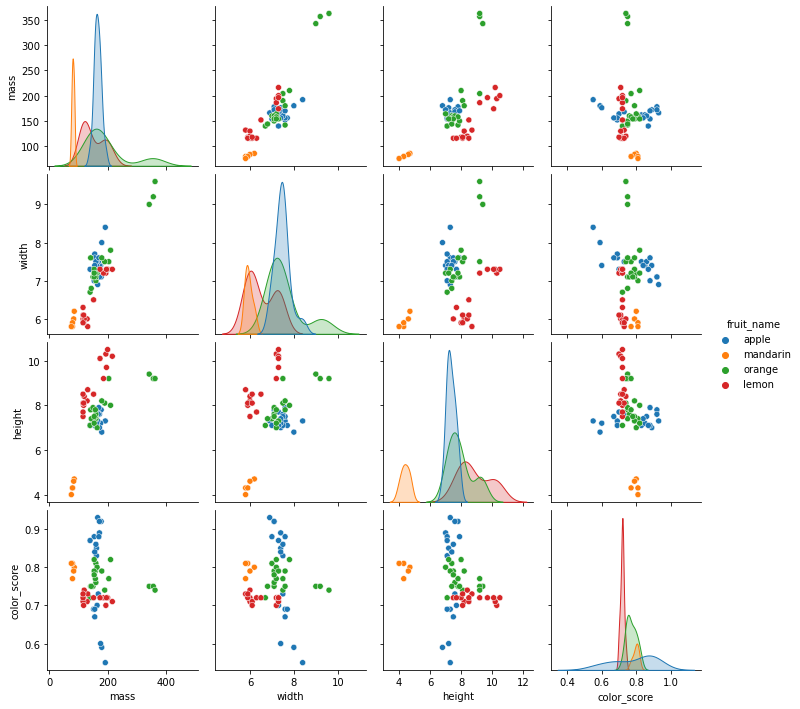

In [447]:
#Create a scatterplot matrix 
sns.pairplot(fruits_subset_df, hue="fruit_name")
plt.savefig("scatterplot_matrix.png") #Saving the figure 

In [448]:
#Comment answers here 


In [449]:
#Creating dependent and independent variables 
X = fruits_subset_df[['mass','width','height','color_score']] #Indenpendent variables 
Y = fruits_subset_df['fruit_name']  # Dependent variable 

In [450]:
#Split dataset into testing and training datasets
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [451]:
#Print Summary for independent variables from training dataset
print(X_train.describe())

             mass      width     height  color_score
count   41.000000  41.000000  41.000000    41.000000
mean   160.878049   7.058537   7.682927     0.758049
std     53.607926   0.842608   1.236710     0.076034
min     80.000000   5.800000   4.300000     0.550000
25%    130.000000   6.200000   7.300000     0.720000
50%    158.000000   7.200000   7.600000     0.750000
75%    172.000000   7.500000   8.200000     0.810000
max    356.000000   9.200000  10.500000     0.920000


In [452]:
#Print Summary for independent variables from test dataset
print(X_test.describe())

             mass      width     height  color_score
count   18.000000  18.000000  18.000000    18.000000
mean   168.222222   7.211111   7.716667     0.773889
std     59.380682   0.767646   1.649331     0.079789
min     76.000000   5.800000   4.000000     0.600000
25%    144.000000   7.100000   7.200000     0.725000
50%    162.000000   7.200000   7.550000     0.765000
75%    179.000000   7.375000   8.175000     0.805000
max    362.000000   9.600000  10.300000     0.930000


In [456]:
#Create a 5NN classifier 
knn = KNeighborsClassifier(n_neighbors = 5)

In [457]:
#Train dataset
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [458]:
#perform prediction
y_prediction = knn.predict(X_test) 
print(y_prediction) #for verification purpose 

['orange' 'apple' 'lemon' 'lemon' 'apple' 'apple' 'lemon' 'lemon' 'apple'
 'lemon' 'mandarin' 'apple' 'orange' 'apple' 'lemon' 'apple' 'apple'
 'mandarin']


In [459]:
conf = metrics.confusion_matrix(Y_test,y_prediction)
print (conf)

[[3 1 0 0]
 [1 2 0 0]
 [0 0 2 0]
 [4 3 0 2]]


In [460]:
#print model accuracy rate 
knn.score(X_test,Y_test)

#The more we train , the more prediction rate gets better 

0.5

In [ ]:
#******************************END OF 4TH QUESTION *******************************************************

1.0
You cannot reject the null hypothesis at the 0.05 level of significance
The time-series is non-stationary


/Users/lniyomwungeri2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


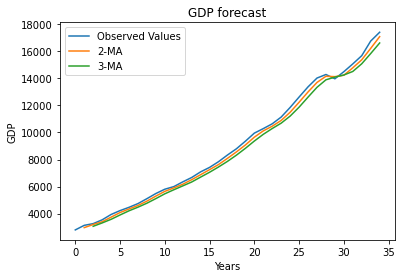

In [461]:
#************************************* 5TH QUESTION***************************************************************
# Upload your dataset
gdp_df = pd.read_excel('GDP.xlsx')

# Dickey-Fuller test on the GDP column
adfuller_results = adfuller(gdp_df['GDP'])
level_significance = 0.05
# In a comment or markdown, specify the p-value, whether or not you can reject the null hypothesis, 
# and whether or not the time series is stationary
p_value = adfuller_results[1]
print(p_value)
if(p_value < level_significance):
    print("You can reject the null hypothesis at the {} level of significance".format(level_significance))
    print("The time-series is stationary")
else:
    print("You cannot reject the null hypothesis at the {} level of significance".format(level_significance))
    print("The time-series is non-stationary")

# the moving average of GDP with a 2 period time
time_period = 2
gdp_df['mov_avg{}'.format(time_period)]= gdp_df['GDP'].rolling(window=time_period).mean()

# the moving average of GDP with a 3 period time
time_period = 3
gdp_df['mov_avg{}'.format(time_period)]= gdp_df['GDP'].rolling(window=time_period).mean()

# SimpleExpSmoothing with 0.01 constant
fit = SimpleExpSmoothing(gdp_df["GDP"]).fit(smoothing_level=0.1)
fcast = fit.forecast(35).rename("SES")
# df["exp_smooth"] = list(fcast)

# line graph that graphs gdp, mov_avg_2, mov_avg_3,
fig, ax = plt.subplots()
data = gdp_df.drop(columns="Year")
data.plot.line(ax=ax)

# Add a title, x-axis label, y-axis label, and legend
ax.legend(["Observed Values", "2-MA", "3-MA", "Exp Smooth"])
plt.title("GDP forecast")
plt.xlabel("Years")
plt.ylabel("GDP")

# Mean Absolute Error for each of the 3 forecasts
gdp_df = gdp_df.dropna()
mae_2 = mean_absolute_error(gdp_df["GDP"], gdp_df["mov_avg3"])
mae_3 = mean_absolute_error(gdp_df["GDP"], gdp_df["mov_avg3"])
# mae_exp = mean_absolute_error(df["GDP"], df["exp_smooth"])

# In a comment or markdown, explain which forecast is the most accurate and why 


In [477]:
# the forecast which is the most accurate is 2-MA because it is closer to observed values than 3-MA

In [462]:
#*****************************************END OF 5th QUESTION***************************************************

In [463]:
#*******************************************6TH QUESTION****************************************************
#Load insuranceFraud DataSet 
insuranceFraud_df= pd.read_excel('InsuranceFraud.xlsx') 
insuranceFraud_df.head() #For verification purpose 

,ID,Fraud Coded,Fraud,New Business Coded,New Business,Claims/year
0,1,1,Yes,0,No,0.21
1,2,1,Yes,0,No,0.25
2,3,1,Yes,0,No,0.33
3,4,1,Yes,0,No,0.33
4,5,1,Yes,0,No,0.35


In [465]:
# Converts the feature "Fraud" to a binary feature and adds as new column "targets"
insuranceFraud_df.loc[insuranceFraud_df["Fraud"] == 'No'] = 0
insuranceFraud_df.loc[insuranceFraud_df["Fraud"] == 'Yes'] = 1
# bool_val = np.multiply(wins, 1)
targets = insuranceFraud_df.Fraud == 1
bool_val = np.multiply(targets, 1)
targets = pd.DataFrame(bool_val, columns = ["Fraud"])
new_targets = targets.rename(columns = {"Fraud": "targets"})
df_final = pd.concat([insuranceFraud_df, new_targets], axis=1) 

In [467]:
#Split the data into training and test
#xTrain,xTest,yTrain,yTest= train_test_split(ind_var,dep_var,test_size=0.3,random_state=0)
train,test= train_test_split(df_final,test_size=0.3,random_state=0)

In [468]:
# builds the logistic model
logRegr = LogisticRegression()
logRegr.fit(train[["Claims/year"]], np.ravel(train[["targets"]]))

LogisticRegression()

In [469]:
# runs the model on the test set
predictions = logRegr.predict(test[["Claims/year"]])
print(predictions)

[1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0]


In [471]:
# generates confusion matrix
conf = metrics.confusion_matrix(test[["targets"]], predictions)
print(conf)

[[15  0]
 [ 0 15]]


In [472]:
sens = 1- conf[1,0]/(conf[0,1]+conf[1,1])# code to calculate the sensitivity
print(sens)

1.0


In [473]:
#**************************************END OF 6TH QUESTION***************************************